In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
# sorry, this notebook is a bit all over the place

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import vars

In [4]:
data = pd.read_csv("./CLEAN_ABCD_5.1_panel_20240917.csv", low_memory=False, index_col=0)
sample = data

# Standardize puberty data
sample['puberty_k'] = sample[['female_puberty', 'male_puberty']].apply(lambda x: x.iloc[0] if pd.notna(x.iloc[0]) else x.iloc[1], axis=1)

# Across Categories

In [27]:
# across categories first
tp = 2

all_vars = vars.across_categories + ["latent_class_depression"]
all_data = sample.query(f"time == {tp}")[all_vars]
all_data = all_data[(all_data["latent_class_depression"] != "")]

t_available = all_data.dropna(axis=1, how='all')  # Keep columns with at least some non-NaN values

raw_X = t_available.drop('latent_class_depression', axis=1)
raw_y = t_available['latent_class_depression']

In [28]:
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
raw_X = pd.DataFrame(imputer.fit_transform(raw_X), columns=raw_X.columns)

In [29]:
# Standardize the data
scaler = StandardScaler()
imputed_scaled = pd.DataFrame(scaler.fit_transform(raw_X), columns=raw_X.columns)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(raw_X, raw_y, test_size=0.3, random_state=0)

In [34]:
clf = RandomForestClassifier(n_estimators=200, random_state=0, oob_score=True)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=0)

In [35]:
print(f"oob accuracy estimate: {clf.oob_score_}")
print(f"test dataset accuracy: {clf.score(X_test, y_test)}")

oob accuracy estimate: 0.7624381349309716
test dataset accuracy: 0.7675478577939836


In [36]:
coefs = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
vars.save_plot_2(coefs, "random forest", "test accuracy", clf.score(X_test, y_test), tp)

/Users/Raphael/Desktop/GabLab/ABCD/python_analysis/vars.py:308: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plt.title(f"{name} ({metric} = {metric_score:.4f}, t = {tp}")


In [ ]:
features = ["weight", "worries_p", ("weight", "worries_p")]
features_2 = ["family_organisation_ss_p", ("family_organisation_ss_p", "worries_p")]
features_3 = ["saliva_testosterone", ("saliva_testosterone", "weight")]

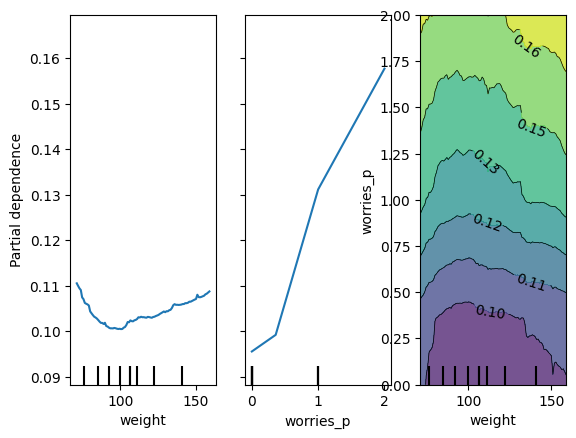

In [63]:
PartialDependenceDisplay.from_estimator(clf, X_train, features, feature_names=list(X_train.columns), n_jobs=4, target="falling")

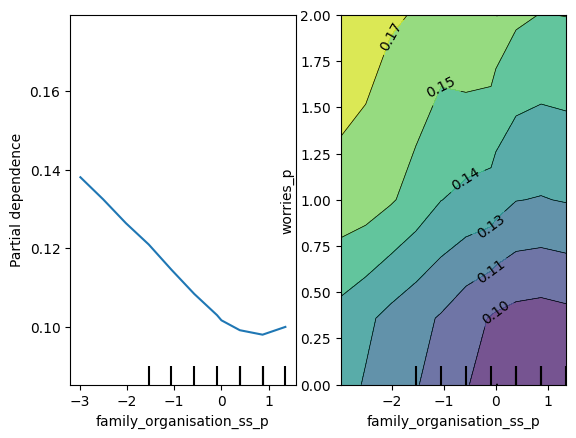

In [65]:
PartialDependenceDisplay.from_estimator(clf, X_train, features_2, feature_names=list(X_train.columns), n_jobs=4, target="falling")

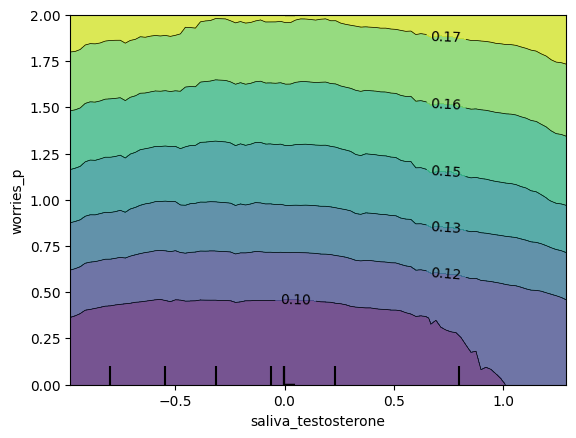

In [56]:
PartialDependenceDisplay.from_estimator(clf, X_test, [("saliva_testosterone", "worries_p")], n_jobs=4, feature_names=list(X_test.columns), target="rising")

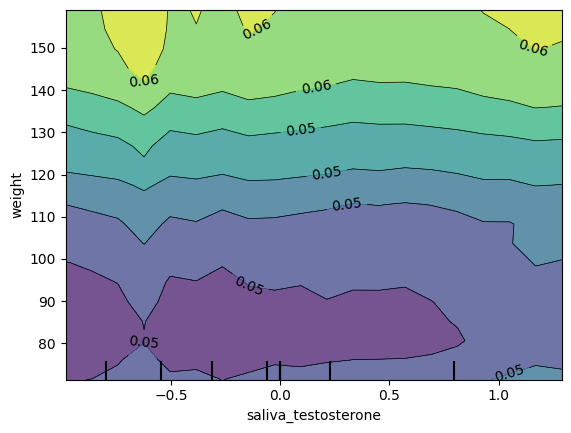

In [68]:
PartialDependenceDisplay.from_estimator(clf, X_test, [("saliva_testosterone", "weight")], grid_resolution=20, n_jobs=4, feature_names=list(X_test.columns), target="high")

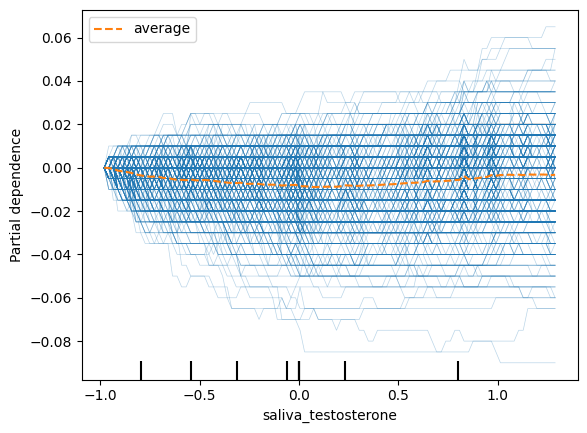

In [81]:
PartialDependenceDisplay.from_estimator(clf, X_test, ['saliva_testosterone'], n_jobs=4, feature_names=list(X_test.columns), target="falling", kind="both", centered=True)

# Within Categories

In [ ]:
# run on within categories next...
# and then run on low ale

tp = 2

all_vars = vars.across_categories + ["latent_class_depression"]
all_data = sample.query(f"time == {tp}")[all_vars]
all_data = all_data[(all_data["latent_class_depression"] != "")]

t_available = all_data.dropna(axis=1, how='all')  # Keep columns with at least some non-NaN values

raw_X = t_available.drop('latent_class_depression', axis=1)
raw_y = t_available['latent_class_depression']

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
raw_X = pd.DataFrame(imputer.fit_transform(raw_X), columns=raw_X.columns)

# Standardize the data
scaler = StandardScaler()
imputed_scaled = pd.DataFrame(scaler.fit_transform(raw_X), columns=raw_X.columns)

X_train, X_test, y_train, y_test = train_test_split(raw_X, raw_y, test_size=0.3, random_state=0)

clf = RandomForestClassifier(n_estimators=200, random_state=0, oob_score=True)
clf.fit(X_train, y_train)

print(f"oob accuracy estimate: {clf.oob_score_}")
print(f"test dataset accuracy: {clf.score(X_test, y_test)}")

coefs = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
vars.save_plot_2(coefs, "random forest", "test accuracy", clf.score(X_test, y_test), tp)

# Predicting Dimensions

In [10]:
# across categories first
tp = 2

all_vars = vars.across_categories + ["depress_D_p"]
all_data = sample.query(f"time == {tp}")[all_vars]
all_data = all_data.dropna(subset=["depress_D_p"])

t_available = all_data.dropna(axis=1, how='all')  # Keep columns with at least some non-NaN values

raw_X = t_available.drop('depress_D_p', axis=1)
raw_y = t_available['depress_D_p']

In [11]:
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
raw_X = pd.DataFrame(imputer.fit_transform(raw_X), columns=raw_X.columns)

In [12]:
# Standardize the data
scaler = StandardScaler()
imputed_scaled = pd.DataFrame(scaler.fit_transform(raw_X), columns=raw_X.columns)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(raw_X, raw_y, test_size=0.3, random_state=0)

In [10]:
clf = RandomForestRegressor(n_estimators=200, random_state=0, oob_score=True)
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True, random_state=0)

In [12]:
print(f"oob R2: {clf.oob_score_}")
print(f"test dataset R2: {clf.score(X_test, y_test)}")

oob R2: 0.44697613905205014
test dataset R2: 0.46647467727751357


In [13]:
coefs = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
vars.save_plot_2(coefs, "random forest dimensions", "R^2", clf.score(X_test, y_test), tp)

/Users/Raphael/Desktop/GabLab/ABCD/python_analysis/vars.py:308: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, palette="gray")


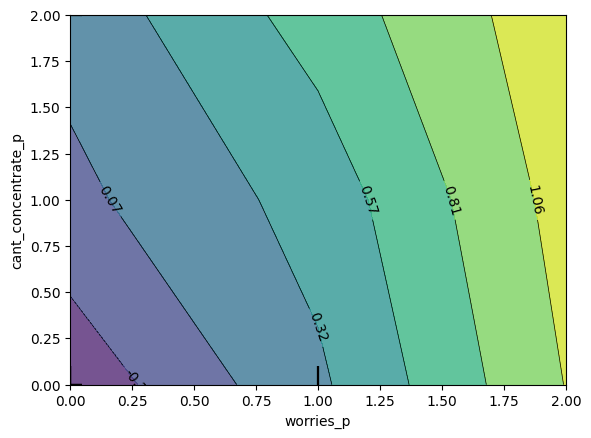

In [16]:
PartialDependenceDisplay.from_estimator(clf, X_test, [('worries_p', 'cant_concentrate_p')], n_jobs=4, feature_names=list(X_test.columns))

# With binary outcome vars (SD, RCI)

In [5]:
def run_rf_classifier (target, tp):
  all_vars = vars.across_categories + [target]
  all_data = sample.query(f"time == {tp}")[all_vars]
  all_data = all_data.dropna(subset=[target])

  t_available = all_data.dropna(axis=1, how='all')  # Keep columns with at least some non-NaN values

  raw_X = t_available.drop(target, axis=1)
  raw_y = t_available[target]

  # Impute missing values using the mean
  imputer = SimpleImputer(strategy='mean')
  raw_X = pd.DataFrame(imputer.fit_transform(raw_X), columns=raw_X.columns)

  # Standardize the data
  scaler = StandardScaler()
  imputed_scaled = pd.DataFrame(scaler.fit_transform(raw_X), columns=raw_X.columns)

  X_train, X_test, y_train, y_test = train_test_split(raw_X, raw_y, test_size=0.3, random_state=0)

  clf = RandomForestClassifier(n_estimators=500, random_state=0, oob_score=True)
  clf.fit(X_train, y_train)

  print(f"{target} oob accuracy estimate: {clf.oob_score_}")
  print(f"{target} test dataset accuracy: {clf.score(X_test, y_test)}")

  coefs = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
  vars.save_plot_2(coefs, f"random forest {target}", "test accuracy", clf.score(X_test, y_test), tp)

  return clf

In [6]:
targets = [
  "top_10_depression",
  "top_5_depression",
  "dep_onset_rci_1.96",
  "dep_onset_rci_2.3",
  "dep_remission_rci_1.96",
  "dep_remission_rci_2.3",
  "dep_decrease_2sd",
  "dep_decrease_1.5sd",
  "dep_increase_2sd",
  "dep_increase_1.5sd"
]

models = {}

for target in targets:
  models[target] = run_rf_classifier(target, 2)

top_10_depression oob accuracy estimate: 0.9010158895545715
top_10_depression test dataset accuracy: 0.9094500151929504
top_5_depression oob accuracy estimate: 0.9535035165407658
top_5_depression test dataset accuracy: 0.9495594044363416
dep_onset_rci_1.96 oob accuracy estimate: 0.9412607449856734
dep_onset_rci_1.96 test dataset accuracy: 0.9492555454269219
dep_onset_rci_2.3 oob accuracy estimate: 0.9412607449856734
dep_onset_rci_2.3 test dataset accuracy: 0.9492555454269219
dep_remission_rci_1.96 oob accuracy estimate: 0.9596249023183121
dep_remission_rci_1.96 test dataset accuracy: 0.9592828927377697
dep_remission_rci_2.3 oob accuracy estimate: 0.9596249023183121
dep_remission_rci_2.3 test dataset accuracy: 0.9592828927377697
dep_decrease_2sd oob accuracy estimate: 0.9850221411825997
dep_decrease_2sd test dataset accuracy: 0.9826800364630811
dep_decrease_1.5sd oob accuracy estimate: 0.9704350091169576
dep_decrease_1.5sd test dataset accuracy: 0.9665755089638408
dep_increase_2sd oob a

In [24]:
models

{'top_10_depression': RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0),
 'top_5_depression': RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0),
 'dep_onset_rci_1.96': RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0),
 'dep_onset_rci_2.3': RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0),
 'dep_remission_rci_1.96': RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0),
 'dep_remission_rci_2.3': RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0),
 'dep_decrease_2sd': RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0),
 'dep_decrease_1.5sd': RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0),
 'dep_increase_2sd': RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0),
 'dep_increase_1.5sd': RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)}

# SHAP

In [7]:
import shap

/Users/Raphael/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Initialize SHAP explainer for the trained model
explainer = shap.TreeExplainer(models['dep_onset_rci_1.96'])

In [ ]:
# Compute SHAP values for the test set
# WARNING: takes a long time!!! (~8 mins)
shap_values = explainer(X_test)

In [22]:
# faster, approximation
s_values = explainer.shap_values(X_test, approximate=True)

In [24]:
shap_values.shape

(3268, 59, 2)

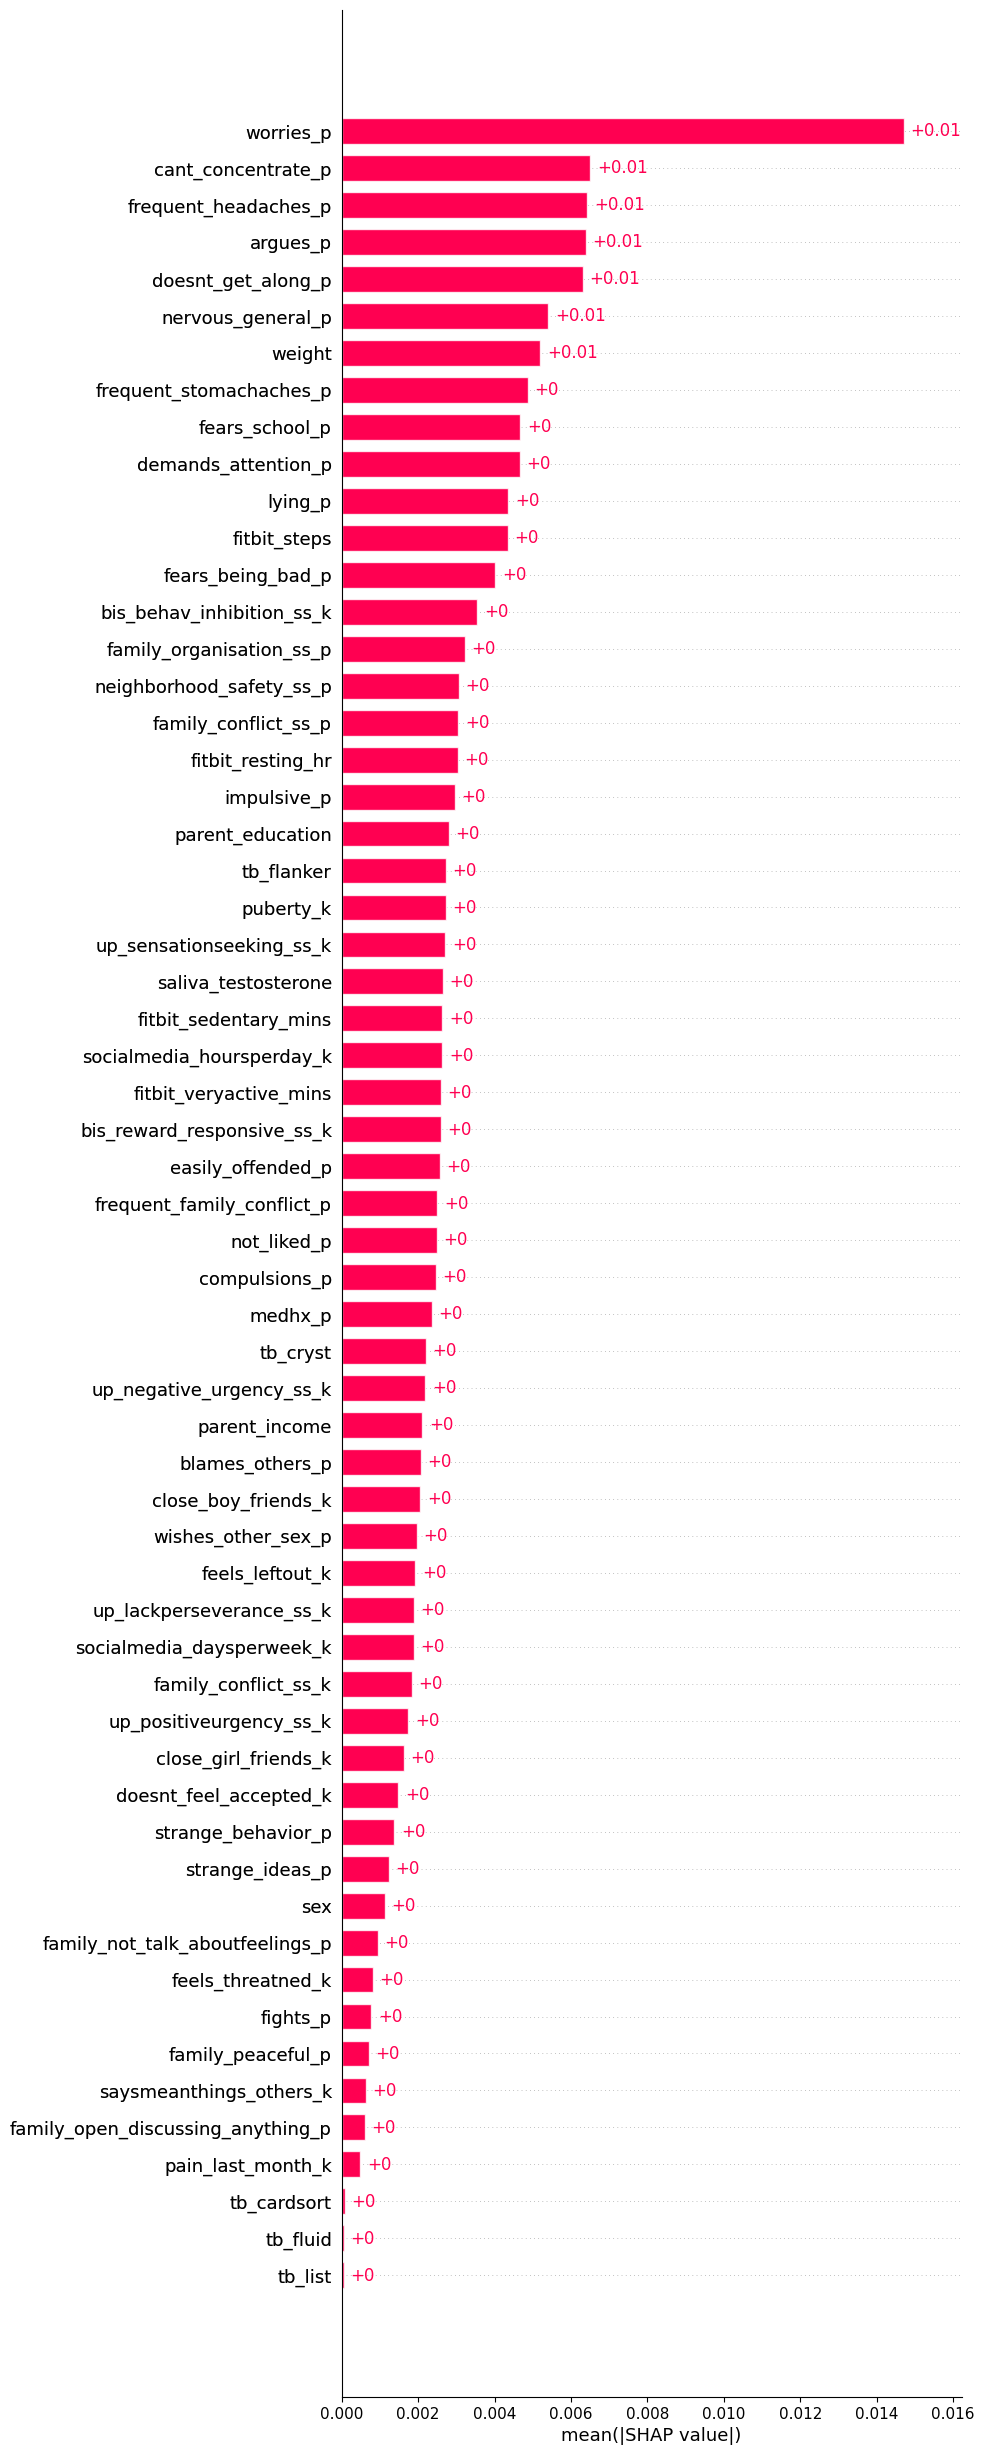

In [48]:
shap.plots.bar(shap_values[:,:,1], max_display=60)

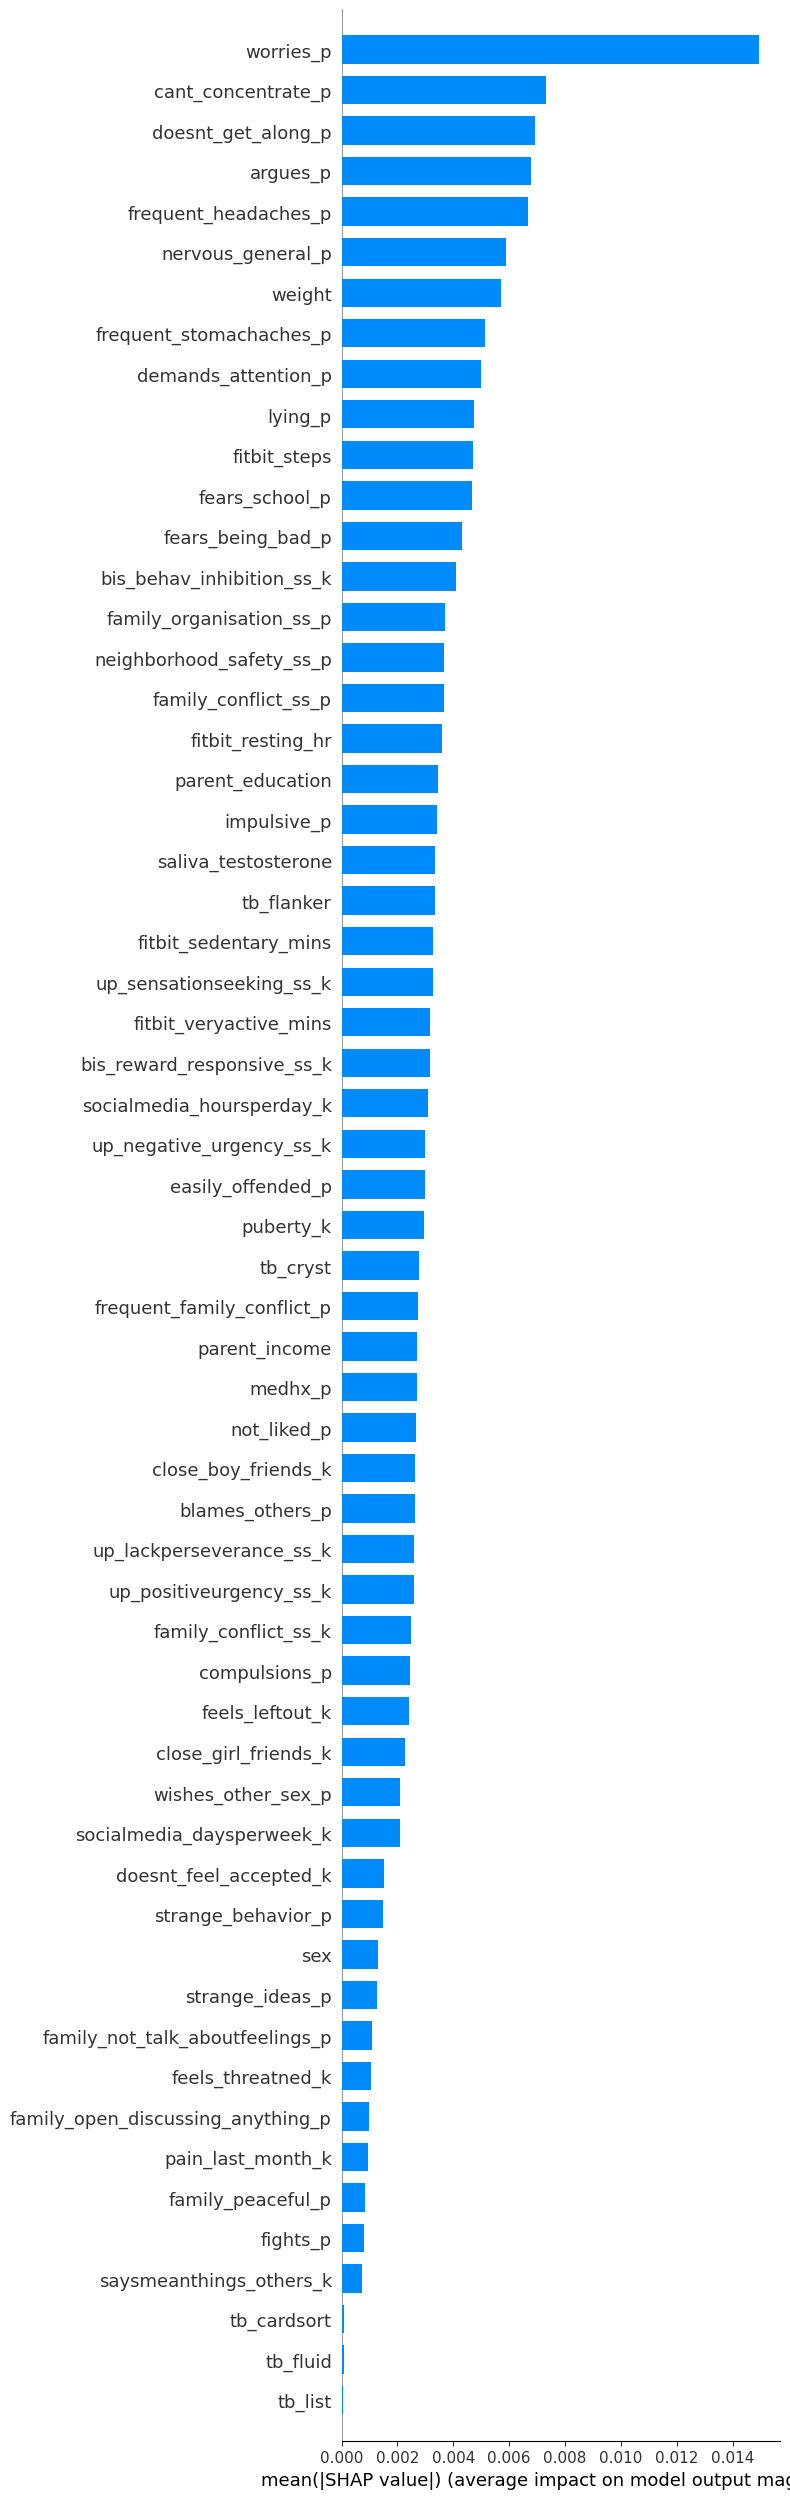

In [47]:
shap.summary_plot(s_values[:,:,1], X_test, plot_type="bar", max_display=60)

In [51]:
# generate importance plots for all

for (name, model) in models.items():
  explainer = shap.TreeExplainer(model)
  vals = explainer.shap_values(X_test, approximate=True)
  plot = shap.summary_plot(vals[:,:,1], X_test, plot_type="bar", max_display=60, show=False) 
  filename = f"plots/importance {name}.png"
  plt.savefig(filename, dpi=300)
  plt.close()


In [ ]:
# SHAP interaction values (pairwise interactions between features)
# shap_interaction_values = explainer.shap_interaction_values(X_test)

In [ ]:
# Plot interaction between two specific features (e.g., 'RM' and 'LSTAT')
# shap.dependence_plot(('RM', 'LSTAT'), shap_interaction_values, X_test, feature_names=list(X_test.columns))